In [2]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
import glob as glob
import os

In [3]:
dir_lst = os.listdir('./scPDB')
print(dir_lst[0])
print(os.listdir('./scPDB/4oxx_1'))

filename_lst = [filename for filename in os.listdir('./scPDB/4oxx_1') if 'site' in filename or 'protein' in filename]
filename_lst

4oxx_1
['cavityALL.mol2', 'site.mol2', 'ligand.mol2', 'protein.mol2', 'cavity6.mol2', 'ints_M.mol2', 'ligand.sdf', 'IFP.txt']


['site.mol2', 'protein.mol2']

In [20]:
protein = mda.Universe('./scPDB/4oxx_1/protein.mol2', format='mol2')
protein_ca = protein.select_atoms('name CA')

/home/strobelm/.local/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: C.2
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/strobelm/.local/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: C.3
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/strobelm/.local/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: C.ar
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/strobelm/.local/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: C.cat
  warnings.warn("Failed to guess the mass for the following atom types: {}".form

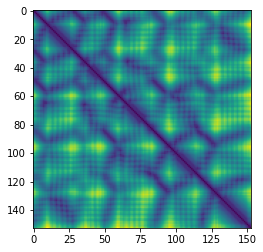

In [21]:
# print(dir(u.atoms[0]))
# u.atoms[0].name
from MDAnalysis.analysis import distances
import matplotlib.pyplot as plt

self_distances = distances.self_distance_array(protein_ca.atoms.positions)

sq_dist_arr = np.zeros((len(protein_ca.atoms), len(protein_ca.atoms)))
triu = np.triu_indices_from(sq_dist_arr, k=1)

sq_dist_arr[triu] = self_distances
sq_dist_arr.T[triu] = self_distances
plt.imshow(sq_dist_arr)

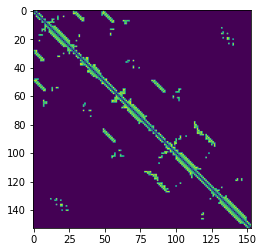

In [22]:
trimmed = sq_dist_arr
trimmed[trimmed > 7] = 0
plt.imshow(trimmed)

In [ ]:
import re
import pandas as pd

for resname in protein_ca.resiudes:
    name = "".join(re.findall("[a-zA-Z]+", resname))



/home/strobelm/.local/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: C.2
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/strobelm/.local/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: C.3
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/strobelm/.local/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: C.ar
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/strobelm/.local/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: N.2
  warnings.warn("Failed to guess the mass for the following atom types: {}".format

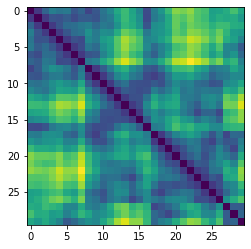

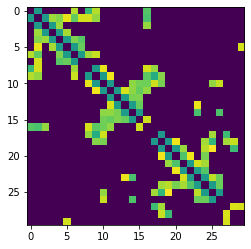

In [19]:
site = mda.Universe('./scPDB/4oxx_1/site.mol2', format='mol2')
site_ca = site.select_atoms('name CA')

self_distances = distances.self_distance_array(site_ca.atoms.positions)

sq_dist_arr = np.zeros((len(site_ca.atoms), len(site_ca.atoms)))
triu = np.triu_indices_from(sq_dist_arr, k=1)

sq_dist_arr[triu] = self_distances
sq_dist_arr.T[triu] = self_distances
plt.imshow(sq_dist_arr)
plt.show()

trimmed = sq_dist_arr
trimmed[trimmed > 7] = 0
plt.imshow(trimmed)
plt.show()

<ResidueGroup [<Residue MET1, 1>, <Residue ASN2, 2>, <Residue ALA3, 3>, ..., <Residue HOH434, 156>, <Residue HOH450, 157>, <Residue HOH481, 158>]>
